In [1]:
# Analyse univariée : une seule colonne
# Données Numériques
    # Histogramme
    # Box Plot / Boîte à Moustache
    # Density Plot
    # Violin Plot
# Données Catégorielles
    # Bar Plot
    # Pie Chart

# Analyse bivariée : deux colonnes ou plus
# 2 Données numériques 
    # Line Plot : attention car pas forcément de continuité entre les points. A utiliser pour les séries temporelles.
    # Scatter Plot
    # Heatmap / hexagonal binning
# 2 Données catégorielles
    # Table de contigence / coocurrence + Heatmap
# Numérique X Catégoriel
    # Bar Plot
    # Violin Plot
    # Density Plot
    # Box Plot
    
# Analyse multivariée : Scatter Matrix / Pair Grid

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
vehicles_df = pd.read_csv('vehicles.csv')

In [6]:
vehicles_df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


<AxesSubplot:xlabel='City MPG', ylabel='Count'>

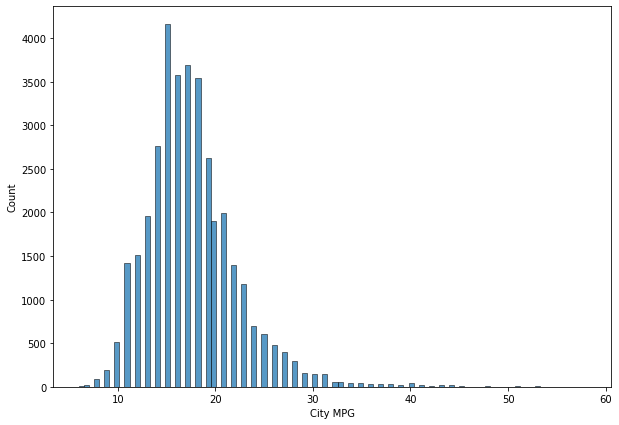

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=vehicles_df,
             x='City MPG',
             bins=100)

In [14]:
pd.cut(vehicles_df['City MPG'], bins=10).value_counts()

(11.2, 16.4]     13966
(16.4, 21.6]     13764
(21.6, 26.8]      4364
(5.948, 11.2]     2241
(26.8, 32.0]      1211
(32.0, 37.2]       202
(37.2, 42.4]       121
(42.4, 47.6]        47
(47.6, 52.8]        27
(52.8, 58.0]         9
Name: City MPG, dtype: int64

<AxesSubplot:xlabel='City MPG'>

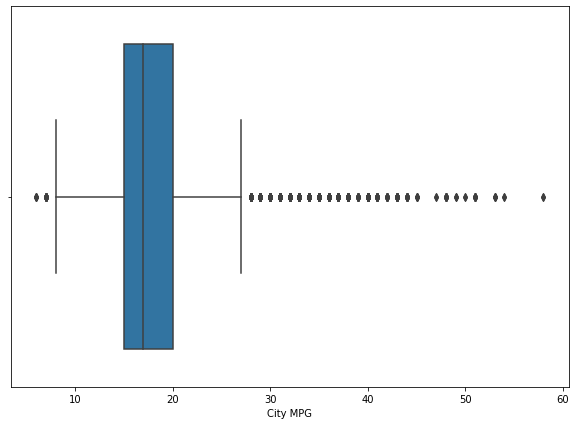

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=vehicles_df,
            x='City MPG')

<AxesSubplot:xlabel='City MPG'>

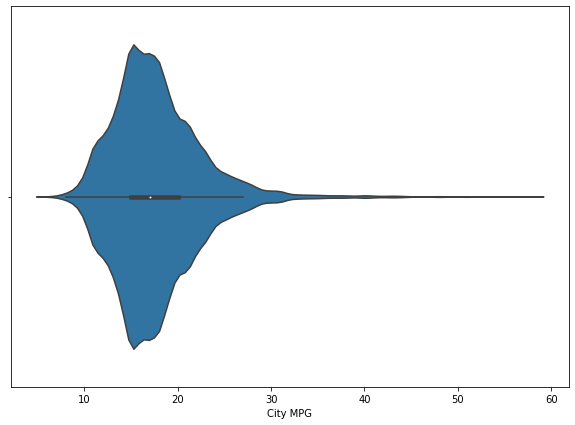

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(data=vehicles_df,
               x='City MPG')

In [9]:
import numpy as np

In [10]:
vehicles_df['Fuel Type dummy'] = np.where(vehicles_df['Fuel Type'] == 'Regular', 1, 0)

<AxesSubplot:xlabel='City MPG', ylabel='Transmission'>

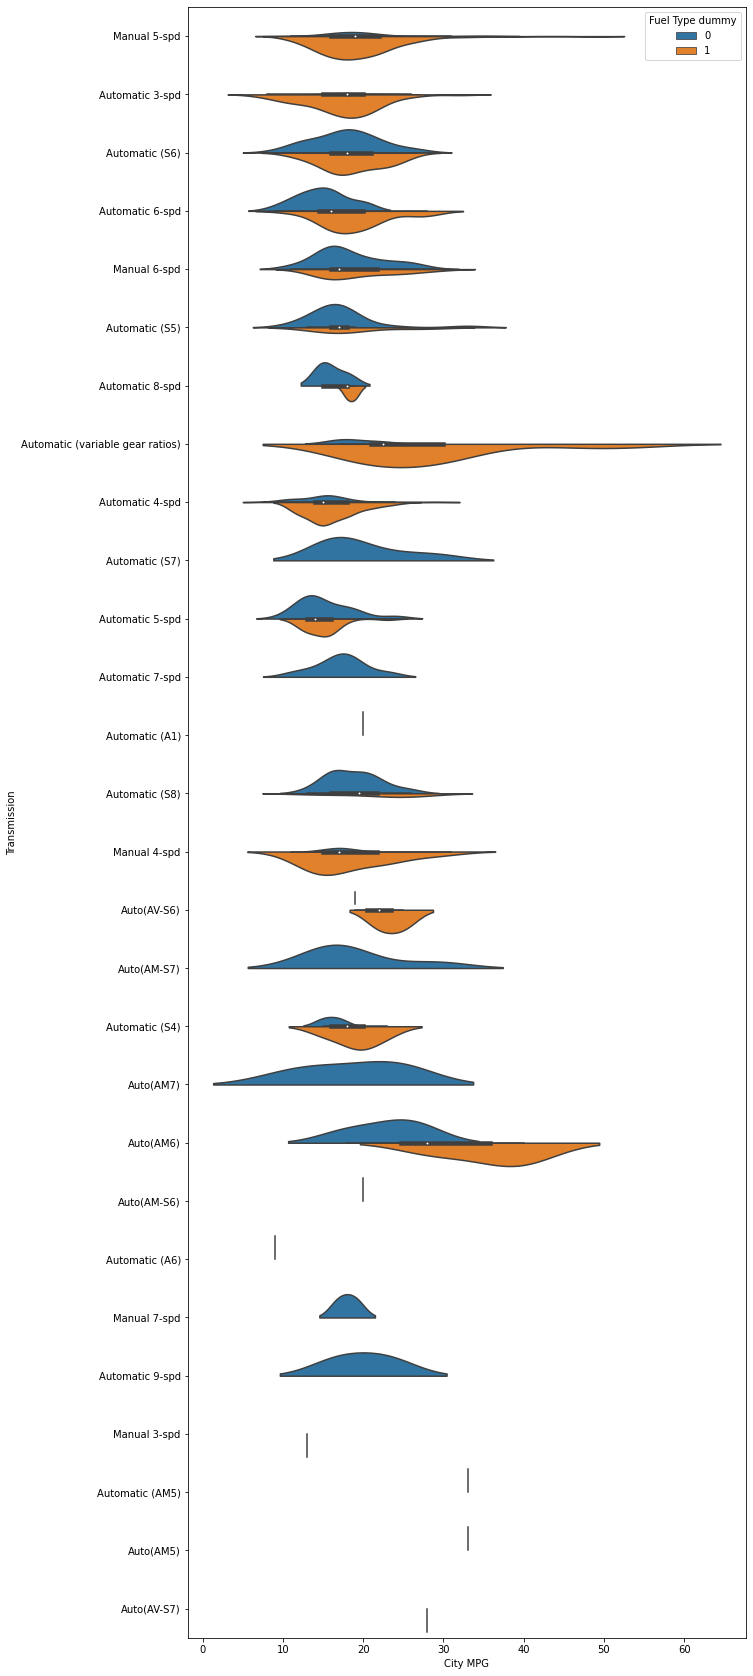

In [33]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.violinplot(data=vehicles_df.sample(1000),
               x='City MPG',
               y='Transmission',
               hue='Fuel Type dummy',
              split=True, scale='count')

<AxesSubplot:xlabel='City MPG', ylabel='Density'>

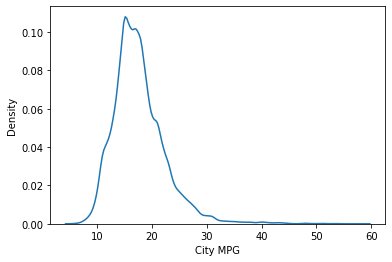

In [34]:
sns.kdeplot(data=vehicles_df,
            x='City MPG')

<AxesSubplot:xlabel='City MPG', ylabel='Count'>

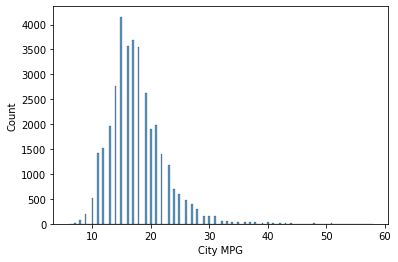

In [35]:
sns.histplot(data=vehicles_df,
            x='City MPG')

In [36]:
vehicles_df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Fuel Type dummy
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,1
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,1
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,1
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,1
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,0


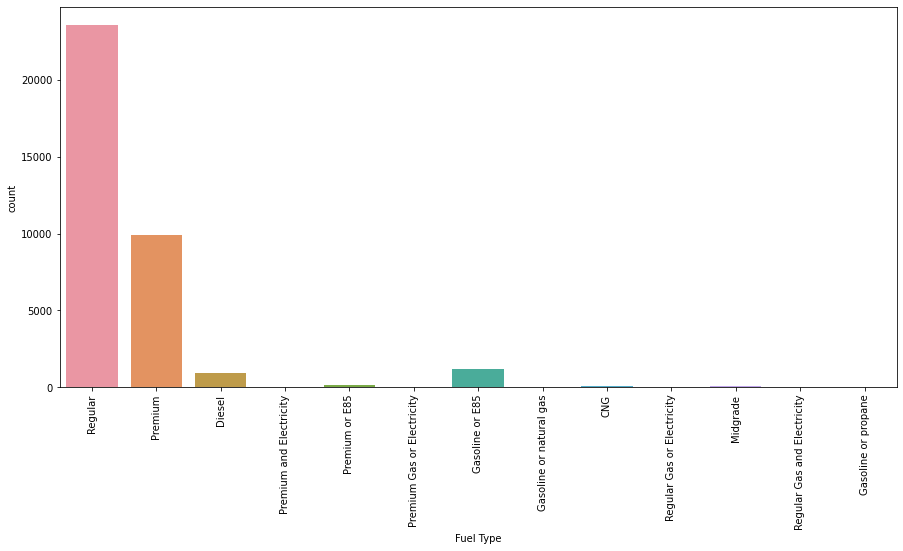

In [49]:
fig, ax= plt.subplots(figsize=(15, 7))
plt.xticks(rotation=90)
sns.countplot(data=vehicles_df,
              x='Fuel Type')
plt.savefig('barplot.png')

array([<AxesSubplot:ylabel='Fuel Type'>], dtype=object)

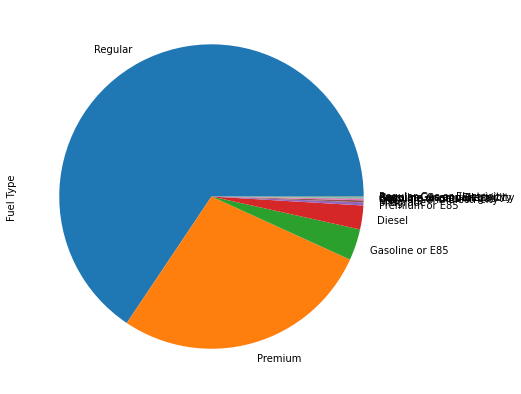

In [50]:
fig, ax= plt.subplots(figsize=(7, 7))
vehicles_df['Fuel Type'].value_counts().plot.pie(subplots=True)

In [51]:
# Analyse bivariée

In [52]:
# Create a list of data to be represented in x-axis
days = [ 'Saturday' , 'Sunday' , 'Monday' , 'Tuesday' ,
        'Wednesday' , 'Thursday' , 'Friday' ]
  
# Create a list of data to be 
# represented in y-axis
calories = [ 1670 , 2011 , 1853 , 2557 ,
            1390 , 2118 , 2063 ]
  
# Create a dataframe using the two lists
df_days_calories = pd.DataFrame(
    { 'day' : days , 'calories' : calories })
  
df_days_calories

,day,calories
0,Saturday,1670
1,Sunday,2011
2,Monday,1853
3,Tuesday,2557
4,Wednesday,1390
5,Thursday,2118
6,Friday,2063


<AxesSubplot:xlabel='day', ylabel='calories'>

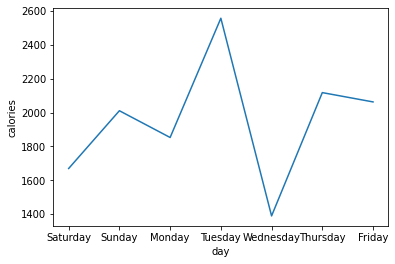

In [53]:
sns.lineplot(data=df_days_calories,
             x='day',
             y='calories')

<AxesSubplot:xlabel='CO2 Emission Grams/Mile', ylabel='City MPG'>

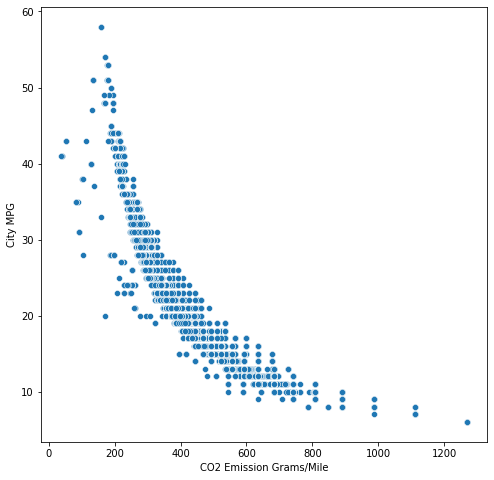

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=vehicles_df,
                x='CO2 Emission Grams/Mile',
                y='City MPG')

In [57]:
vehicles_df[['CO2 Emission Grams/Mile', 'City MPG']].corr()

,CO2 Emission Grams/Mile,City MPG
CO2 Emission Grams/Mile,1.000000,-0.894139
City MPG,-0.894139,1.000000


In [58]:
vehicles_df['inv co2'] = 1 / vehicles_df['CO2 Emission Grams/Mile']

<AxesSubplot:xlabel='inv co2', ylabel='City MPG'>

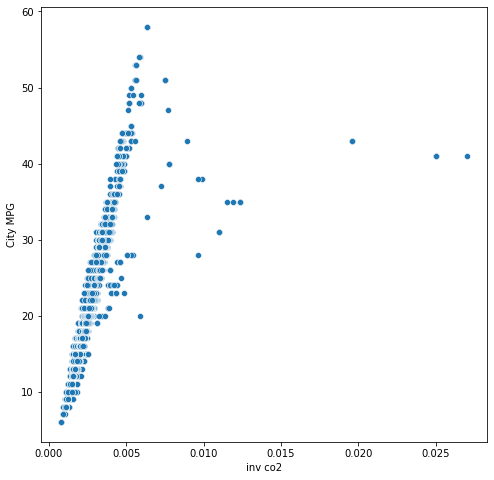

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=vehicles_df,
                x='inv co2',
                y='City MPG')

In [60]:
vehicles_df[['inv co2', 'City MPG']].corr()

,inv co2,City MPG
inv co2,1.000000,0.901536
City MPG,0.901536,1.000000


In [61]:
vehicles_df.

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Fuel Type dummy,inv co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,1,0.001913
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,1,0.001463
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,1,0.001800
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,1,0.001463
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,0,0.001800


<AxesSubplot:xlabel='Fuel Type', ylabel='Transmission'>

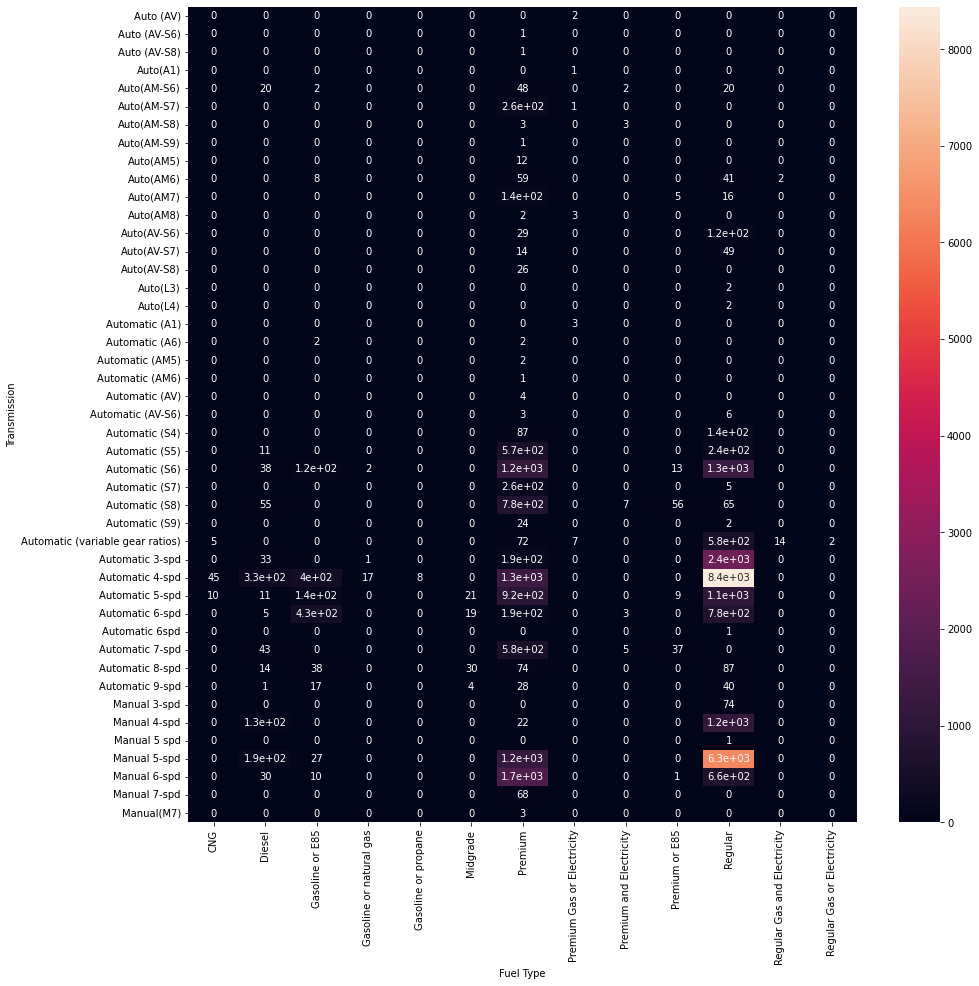

In [65]:
fig, ax= plt.subplots(figsize=(15, 15))
sns.heatmap(pd.crosstab(index=vehicles_df['Transmission'], columns=vehicles_df['Fuel Type']), annot=True)

In [67]:
vehicles_df['Fuel Type dummy']

0        1
1        1
2        1
3        1
4        0
        ..
35947    0
35948    0
35949    0
35950    0
35951    0
Name: Fuel Type dummy, Length: 35952, dtype: int64

<AxesSubplot:xlabel='City MPG', ylabel='Count'>

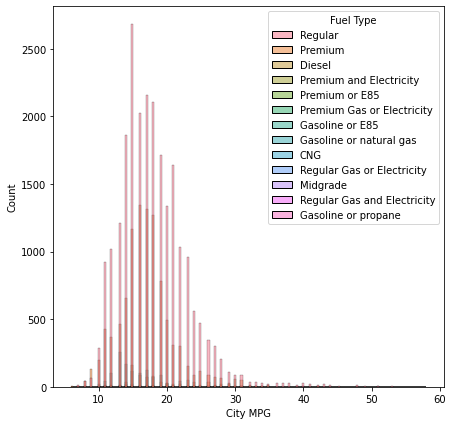

In [71]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.histplot(data=vehicles_df,
             x='City MPG',
             hue='Fuel Type')

<AxesSubplot:xlabel='Fuel Type', ylabel='City MPG'>

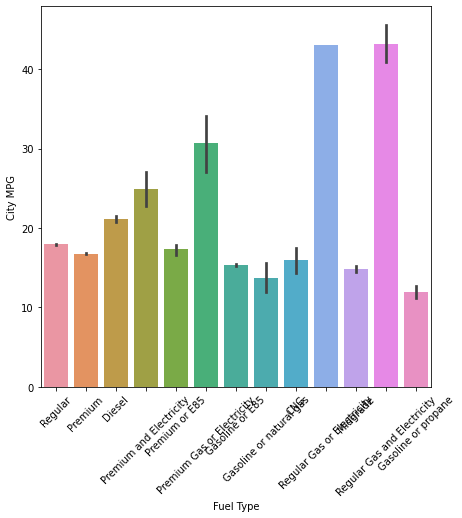

In [77]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.xticks(rotation=45)
sns.barplot(data=vehicles_df,
             y='City MPG',
             x='Fuel Type')

<AxesSubplot:xlabel='Fuel Type', ylabel='City MPG'>

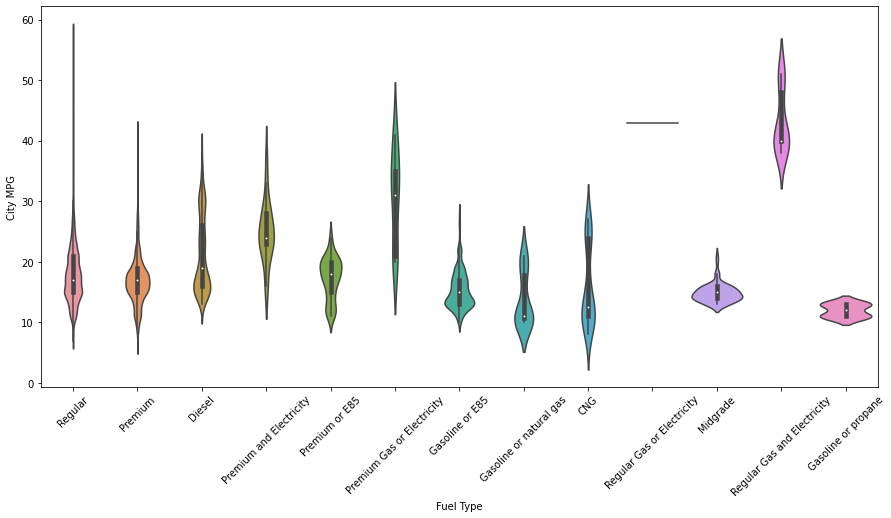

In [81]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
sns.violinplot(data=vehicles_df,
             y='City MPG',
              x='Fuel Type')

/Users/work/.local/share/virtualenvs/datapt090121-u9iSQ8P3/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='City MPG', ylabel='Density'>

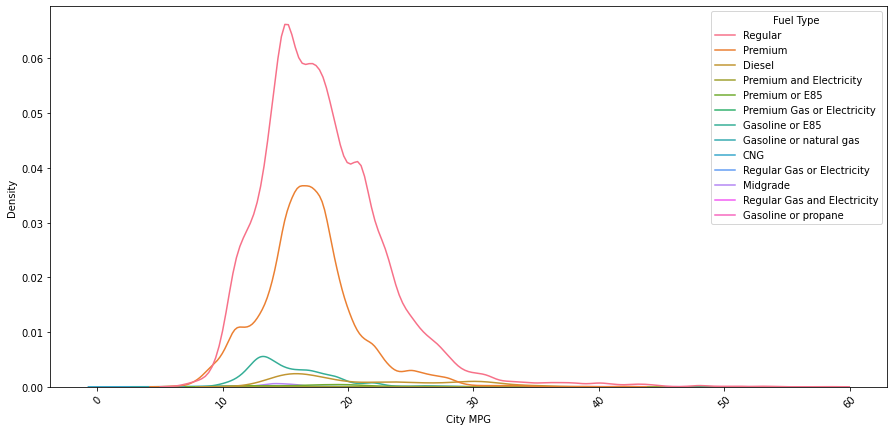

In [82]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
sns.kdeplot(data=vehicles_df,
             x='City MPG',
              hue='Fuel Type')

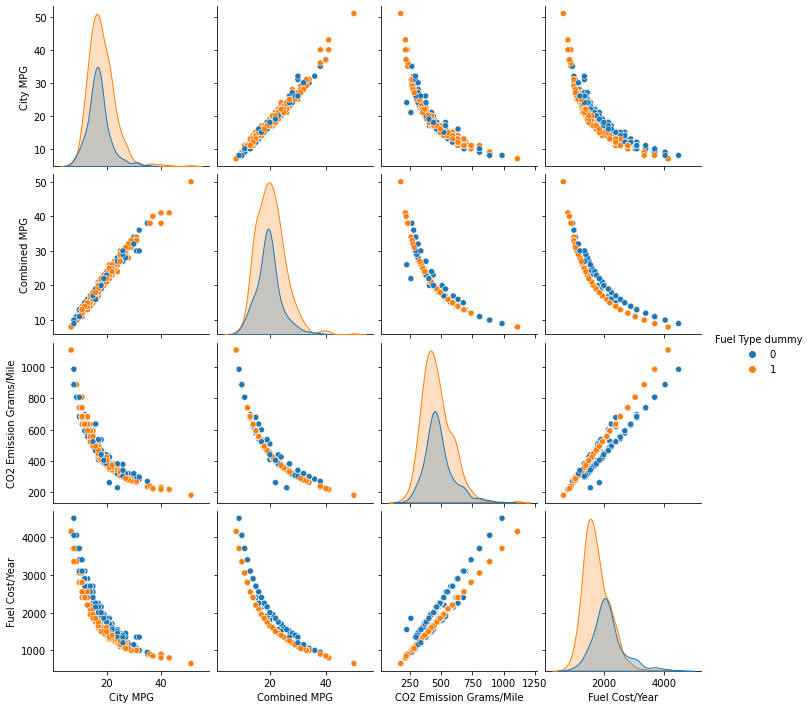

In [12]:
sns.pairplot(vehicles_df[['City MPG', 'Combined MPG', 'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Fuel Type dummy']].sample(1000), hue='Fuel Type dummy')